In [ ]:
import pandas as pd
df=pd.read_csv('/Users/kermi1/Downloads/train_v9rqX0R.csv')
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

# label encoding

In [ ]:
# Mapping the categorical values to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = le.fit_transform(df['Item_Type'])
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])

# data preprocessing 

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df.shape

(8523, 12)

Impute missing values

In [ ]:
#missing values in item weight and outlet size needs to be imputed 
mean=df['Item_Weight'].mean() #imputing item_weight with mean
df['Item_Weight'].fillna(mean,inplace=True)

mode=df['Outlet_Size'].mode() #imputing outlet size with mode
df['Outlet_Size'].fillna(mode[0], inplace=True)

In [ ]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Deal with categorical variables and drop the id columns

In [ ]:
df.drop(['Item_Identifier','Outlet_Identifier'], axis=1,inplace=True)

In [ ]:
df.shape


(8523, 10)

In [ ]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

# Train Test Split and model training

In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.3)

x_train=train.drop('Item_Outlet_Sales',axis=1)
y_train=train['Item_Outlet_Sales']

x_test=test.drop('Item_Outlet_Sales',axis=1)
y_test=test['Item_Outlet_Sales']

# Scaling the Features

from sklearn.preprocessing import MinMaxScalar
scaler=MinMaxScalar(feature_range=(0,1))

#this will give an error bcuz there are categorical values also
hence use one hot encoder

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rmse_val= [] #to store rmse values for diff k
k_list=[]
for K in range(50):
    K=K+1
    model=neighbors.KNeighborsRegressor(n_neighbors=K)
    
    model.fit(x_train,y_train)  #fit model 
    pred=model.predict(x_test) #make preds on test set
    error=sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    k_list.append(K)

In [ ]:
best_rmse_score=min(rmse_val)
best_k=k_list[rmse_val.index(best_rmse_score)]
print("Optimum K value=",best_k,"with least RMS=",best_rmse_score)

Optimum K value= 7 with least RMS= 1310.6343844600829


<AxesSubplot:>

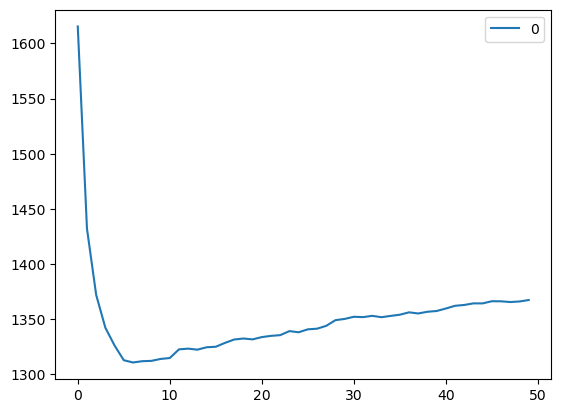

In [ ]:
#plotting the rmse values against k values
curve=pd.DataFrame(rmse_val) #elbow curve
curve.plot()